In [48]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score
import matplotlib.pyplot as plt 
from joblib import dump
from sklearn.model_selection import cross_val_score
import os 

In [6]:
DATA_PATH = '../data/processed/airfoil_transformed.csv'

In [9]:
df =pd.read_csv(DATA_PATH)

In [11]:
df['sqrt_target'] = np.sqrt(df['scaled-sound-pressure'])
df['log_target'] = np.log1p(df['scaled-sound-pressure']) 

In [5]:
selected_features = ['sqrt_target', 'log_target', 'free-stream-velocity', 'attack-angle']


In [13]:
selected_features = ['frequency','suction-side-displacement-thickness','chord-length']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[selected_features])

scaled_df = pd.DataFrame(scaled_features, columns=[f"scaled_{col}" for col in selected_features])

df = pd.concat([df, scaled_df], axis=1)
print(df[['scaled-sound-pressure','frequency','suction-side-displacement-thickness','chord-length' ]].head())


   scaled-sound-pressure  frequency  suction-side-displacement-thickness  \
0                126.201        800                             0.002663   
1                125.201       1000                             0.002663   
2                125.951       1250                             0.002663   
3                127.591       1600                             0.002663   
4                127.461       2000                             0.002663   

   chord-length  
0        0.3048  
1        0.3048  
2        0.3048  
3        0.3048  
4        0.3048  


In [15]:
df = df.loc[:,~df.columns.duplicated()]
print(df.columns.tolist())

['Unnamed: 0', 'frequency', 'attack-angle', 'chord-length', 'free-stream-velocity', 'suction-side-displacement-thickness', 'scaled-sound-pressure', 'log_frequency', 'sqrt_frequency', 'log_chord', 'sqrt_chord', 'log_thickness', 'sqrt_thickness', 'sqrt_target', 'log_target', 'scaled_frequency', 'scaled_suction-side-displacement-thickness', 'scaled_chord-length']


In [17]:
selected_features = [
    'frequency',
    'suction-side-displacement-thickness',
    'chord-length'
]


# Feature and destination selection

In [20]:
x = df[selected_features]
y = df['scaled-sound-pressure']


# Training and testing set

In [23]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y, test_size=0.2 ,random_state=42)

# Define model

In [26]:
model = LinearRegression()

In [28]:
model.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = model.predict(x_test)

In [32]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df.head(10))

       Actual   Predicted
51    125.045  125.375776
1465  118.767  119.794023
184   120.233  122.415463
1000  137.047  129.139963
746   134.556  127.308321
1032  120.766  132.575212
925   124.525  124.611347
394   136.798  125.380492
597   130.123  128.148857
588   123.991  127.778013


In [42]:
model = LinearRegression()
model.fit(x, y)
coef_df = pd.DataFrame({
    'feature': x.columns,
    'coefficient': model.coef_
})
print(coef_df.sort_values(by='coefficient', key=abs, ascending=False))


                               feature  coefficient
1  suction-side-displacement-thickness  -265.978566
2                         chord-length   -25.812060
0                            frequency    -0.001113


In [19]:
os.makedirs('models/trained_models', exist_ok=True)

dump(model, 'models/trained_models/linear_regression_model.pkl')
dump(scaler, 'models/trained_models/scaler.pkl')

['models/trained_models/scaler.pkl']

In [50]:
scores = cross_val_score(model,x,y,cv=5,scoring='r2')

print(f"Her bir katmandaki R2 skorları:{scores}")
print(f"Çapraz doğrulama R2 ortalaması:{scores.mean():.4f}")
print(f"Çapraz doğrulama R2 standart sapması:{scores.std():.4f}")

Her bir katmandaki R2 skorları:[ 0.65225869  0.47447855  0.53435344 -0.43501032  0.44532891]
Çapraz doğrulama R2 ortalaması:0.3343
Çapraz doğrulama R2 standart sapması:0.3911


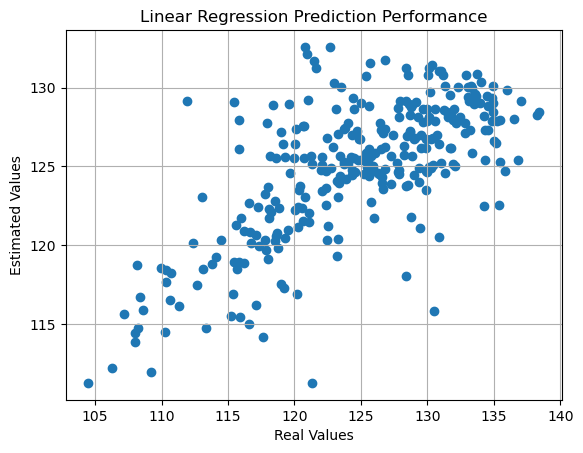

In [65]:
plt.scatter(y_test, y_pred)
plt.xlabel("Real Values")
plt.ylabel("Estimated Values")
plt.title("Linear Regression Prediction Performance")
plt.grid(True)
plt.show()